# Detección de Tejido Cancerígeno en Imágenes de Histología

En la era contemporánea, la integración de la tecnología con la medicina ha abierto puertas innovadoras para el diagnóstico y tratamiento de diversas enfermedades, incluido el cáncer. Una de las técnicas emergentes en este panorama es la segmentación semántica, una especialidad dentro del aprendizaje profundo, dedicada a la identificación y delimitación precisa de estructuras específicas dentro de una imagen.

En el ámbito de la oncología, el análisis microscópico de muestras de tejido, conocido como histología, ha sido el estándar de oro para la detección y clasificación de tejidos cancerosos. Sin embargo, esta tarea es notoriamente laboriosa y depende en gran medida de la habilidad y experiencia del patólogo.

En este contexto, la Inteligencia Artificial se presenta como una herramienta prometedora para asistir y potencialmente revolucionar los métodos tradicionales de diagnóstico histológico. Mediante el uso de algoritmos avanzados, es posible analizar grandes cantidades de imágenes histológicas con una precisión y rapidez sin precedentes, facilitando así la identificación temprana de tejido cancerígeno y ayudando a tomar decisiones clínicas más precisas.

En este taller, exploraremos los fundamentos de la clasificación de imágenes aplicada a la detección de tejido cancerígeno en imágenes histológicas, destacando su potencial para mejorar la eficacia diagnóstica y, en última instancia, contribuir a un manejo más efectivo y personalizado del cáncer.

![Segmentación en cultivos](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs00521-022-07104-9/MediaObjects/521_2022_7104_Fig1_HTML.png)

![Segmentación en imágenes de histología](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGQB2VxZd0IY6HEEkl3MV4pNMhmkcWeNgc1w&usqp=CAU)


## 1. Primero se cargan todos los paquetes necesarios para la actividad.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import color
from skimage import segmentation

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

## 2. Se Descarga y descomprime la base de datos

La base de datos está dividida en dos carpetas; en la primera se encuentran los datos de entrenamiento, en la segunda los datos de prueba.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1c2mrPeND5-jxL43Im8eDi5PCyuTGBLEX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1c2mrPeND5-jxL43Im8eDi5PCyuTGBLEX" -O Train && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1n_zGW0qht4rQauar3hQkqpz8sreb0SRv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1n_zGW0qht4rQauar3hQkqpz8sreb0SRv" -O Test_zip && rm -rf /tmp/cookies.txt

--2023-10-03 16:55:40--  https://docs.google.com/uc?export=download&confirm=t&id=1c2mrPeND5-jxL43Im8eDi5PCyuTGBLEX
Resolving docs.google.com (docs.google.com)... 142.251.2.101, 142.251.2.102, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/382qjavhcsl7qddmpas4bqevuv7lvfpa/1696352100000/10894293165645545263/*/1c2mrPeND5-jxL43Im8eDi5PCyuTGBLEX?e=download&uuid=3f659901-8c15-49f7-b80f-5d67a0a39b2a [following]
--2023-10-03 16:55:40--  https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/382qjavhcsl7qddmpas4bqevuv7lvfpa/1696352100000/10894293165645545263/*/1c2mrPeND5-jxL43Im8eDi5PCyuTGBLEX?e=download&uuid=3f659901-8c15-49f7-b80f-5d67a0a39b2a
Resolving doc-0c-88-docs.googleusercontent.com (doc-0c-88-docs.googleusercontent.com)... 142.251.2.132, 2607:

In [3]:
#Se decomprimen los archivos zip descargados

!unzip /content/Train
!unzip /content/Test_zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_6164_y_ini_1474.png  
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_6298_y_ini_1474.png  
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_5896_y_ini_1608.png  
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_6030_y_ini_1608.png  
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_6164_y_ini_1608.png  
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_6298_y_ini_1608.png  
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_5896_y_ini_1742.png  
  inflating: Train_non_experts_simple/3/TCGA-GM-A3XL-DX1_xmin29910_ymin15820_A3XL_GM_x_ini_6030_y_ini_1742.png  
  inflating: Train_non_expert

## 3. Descripción de la compocisión de la base de datos y visualización de algunas muestras.

Como se puede notar en las carpetas de entrenamiento y prueba existen 3 subcarpetas llamadas 0, 1, 2, la cuales representan cada una de las clases del problema. De esta forma.

- Las imágenes en la carpeta 0 corresponden a tumores.

- Las imágenes en la carpeta 1 corresponden a Estroma (Tejido conjuntivo)

- Las imágenes en la carpeta 2 corresponden a tejidos con inflamación benigna.

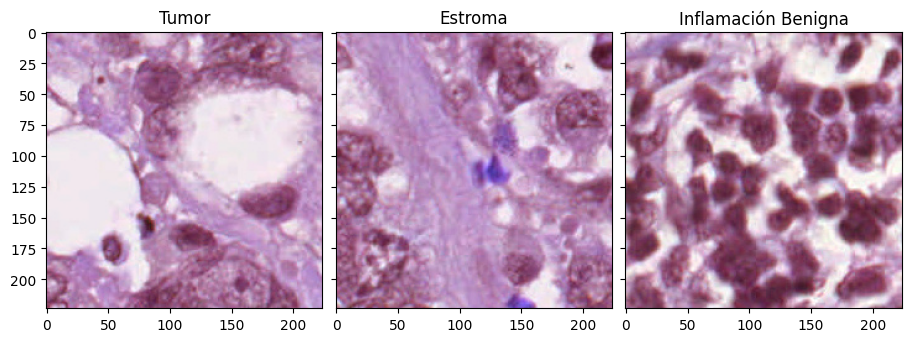

In [4]:
Train_dir_i = '/content/Train_non_experts_simple' #Dirección de las imágenes de entrenamiento


fig, axs = plt.subplots(1, 3, figsize=(9, 5), layout='constrained',
                        sharex=True, sharey=True)

# Se carga una imagen de la carpeta 0 (Tumor)
file_name_i = '/content/Train_non_experts_simple/1/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_A0SK_A1_x_ini_0_y_ini_0.png'
Img_i = cv2.imread(file_name_i)
plt.subplot(1, 3, 1)
plt.title("Tumor")
plt.imshow(Img_i)

# Se carga una imagen de la carpeta 1 (Estroma)
file_name_i = '/content/Train_non_experts_simple/2/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_A0SK_A1_x_ini_0_y_ini_2412.png'
Img_i = cv2.imread(file_name_i)
plt.subplot(1, 3, 2)
plt.title("Estroma")
plt.imshow(Img_i)

# Se carga una imagen de la carpeta 2 (Inflamación Benigna)
file_name_i = '/content/Train_non_experts_simple/3/TCGA-A1-A0SP-DX1_xmin6798_ymin53719_A0SP_A1_x_ini_1072_y_ini_0.png'
Img_i = cv2.imread(file_name_i)
plt.subplot(1, 3, 3)
plt.title("Inflamación Benigna")
plt.imshow(Img_i)



## 5. Preparación de los conjuntos de entrenamiento y prueba.

Hasta este punto los conjuntos de entrenamiento y prueba se encuentran almacenados en carpetas, lo cual no es compatible con las entradas del modelo de clasificación de imágenes. De esta forma, definimos un ImageDataGenerator de tal forma que pueda acceder a las carpetas definidas y se puedan extraer las imágenes en el formato adecuado.

In [5]:
# Se define un ImageDataGenerator para las imágenes de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255) # garantiza que todos los valores
                                                   # estén entre 0 y 1.

# Se define un ImageDataGenerator para las imágenes de prueba
test_datagen = ImageDataGenerator(rescale=1./255) # garantiza que todos los valores
                                                   # estén entre 0 y 1.

In [6]:
train_generator = train_datagen.flow_from_directory(
        '/content/Train_non_experts_simple', # el directorio donde están las imágenes de train
        batch_size= 32, # Cuántas imágenes se toman en iteración
        target_size=(224, 224),
        class_mode='categorical',
        )

test_generator = test_datagen.flow_from_directory(
        '/content/Test', # el directorio donde están las imágenes de train
        batch_size= 32, # Cuántas imágenes se toman en iteración
        target_size=(224, 224),
        class_mode='categorical',
        seed=1
        )

Found 75243 images belonging to 3 classes.
Found 4364 images belonging to 3 classes.


## 6. Se crea un modelo de Aprendizaje Profundo basado en la arquitectura VGG-16

![](https://miro.medium.com/v2/resize:fit:1400/1*NNifzsJ7tD2kAfBXt3AzEg.png)

In [7]:
# Primero, se carga el modelo pre-entrenado. Es una arquitectura VGG16, la cual
# fue entrenada sobre la base de datos imagenet. Notemos que se fija el argumento
# include_top=False, esto elimina la última capa de la red, la cual está relacionada
# con la tarea de aprendizaje para la cual fue entrenada.

# De esta forma, debemos diseñar únicamente la últimas capas con el fin de que se
# adapten a nuestra aplicación, en este caso, una clasificación con 3 clases.
# Además, se debe fijar el argumento input_shape de tal forma que se adapte al
# tamaño de nuestras imágenes.

# En conclusión, esta red tiene más de 14 millones de parámetros. Sin embargo,
# nosotros no entrenaremos todos estos parámetros, sino únicamente los de las
# capas que diseñemos. Claramente esto reduce la cantidad necesaria de recursos
# computacionales y la cantidad de datos.
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [21]:
# Como hemos dicho, nosotros no vamos a entrenar todos los parámetros de la red,
# por esto, debemos indicarle al modelo que los parámetros del modelo base se
# dejarán en su forma actual.
base_model.trainable = False

In [22]:
# Ahora, debemos diseñar las capas superiores de la red, con el fin de que sean
# las adecuadas para la tarea de aprendizaje planteada.
model = keras.Sequential([
    base_model, # se parte del modelo base.

    # Se agregan algunas capas para la tarea de aprendizaje. En este punto no se
    # suele usar capas convolucionales, solo capas densas y de pooling.
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    # la última capa debe corresponder a la tarea de aprendizaje. En este sentido,
    # dado que tenemos un problema de clasificación de 3 clases, usamos una capa
    # con tres unidades y con activación Softmax.
    keras.layers.Dense(3, activation='Softmax')
])

In [23]:
# Se compila el modelo usando el optimizador ADAM, se fija una función de costo
# basada en entropía cruzada y se evalúa el rendimiento en términos del accuracy.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# De los 21 millones de parámetros que tiene esta red, únicamente serán entrenados
# 6 millones. Esto significa una reducción importante en la cantidad de datos y
# por consiguiente en los recursos computacionales.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21138243 (80.64 MB)
Trainable params: 6423555 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [24]:
steps_per_epoch = 300

model.fit(train_generator, validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=100, epochs=10, verbose=2)


Epoch 1/10
300/300 - 64s - loss: 0.6696 - accuracy: 0.7536 - val_loss: 0.5098 - val_accuracy: 0.8138 - 64s/epoch - 214ms/step
Epoch 2/10
300/300 - 70s - loss: 0.5138 - accuracy: 0.7917 - val_loss: 0.5018 - val_accuracy: 0.8097 - 70s/epoch - 233ms/step
Epoch 3/10
300/300 - 62s - loss: 0.5091 - accuracy: 0.7943 - val_loss: 0.5020 - val_accuracy: 0.8163 - 62s/epoch - 208ms/step
Epoch 4/10
300/300 - 63s - loss: 0.4978 - accuracy: 0.7921 - val_loss: 0.5237 - val_accuracy: 0.8147 - 63s/epoch - 210ms/step
Epoch 5/10
300/300 - 62s - loss: 0.4769 - accuracy: 0.8054 - val_loss: 0.5541 - val_accuracy: 0.7634 - 62s/epoch - 206ms/step
Epoch 6/10
300/300 - 69s - loss: 0.4842 - accuracy: 0.8048 - val_loss: 0.4810 - val_accuracy: 0.8238 - 69s/epoch - 228ms/step
Epoch 7/10
300/300 - 63s - loss: 0.4465 - accuracy: 0.8188 - val_loss: 0.4730 - val_accuracy: 0.8309 - 63s/epoch - 212ms/step
Epoch 8/10
300/300 - 69s - loss: 0.4542 - accuracy: 0.8155 - val_loss: 0.5439 - val_accuracy: 0.7891 - 69s/epoch - 228